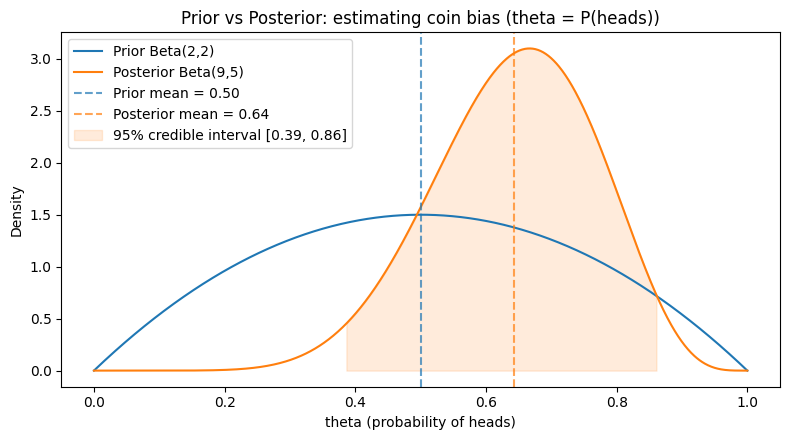

Scenario:
  - Prior belief: Beta(2,2) -> mean 0.50
  - Data observed: 7 heads out of 10 flips

What that means in plain language:
  - Prior: before seeing these flips, you believed the coin was roughly fair (around 0.5),
    but you were uncertain.
  - Likelihood (the data): seeing 7 heads out of 10 suggests the coin might favor heads.
  - Posterior: combine prior + data to get an updated belief.

Posterior results:
  - Posterior is Beta(9,5)
  - Posterior mean (average belief about theta) = 0.643
  - Posterior MAP (most likely theta) = 0.667
  - 95% credible interval for theta ≈ [0.386, 0.861]

Interpretation (layman's terms):
  After seeing the flips, you are more convinced the coin leans toward heads,
  but you still have uncertainty. The posterior compresses both your prior belief and
  the new evidence into a single updated belief about the coin's bias.


In [1]:
# Cell to explain "prior" and "posterior" in layman's terms with a simple coin-flip example.
# Paste this into a new Jupyter cell and run.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# ---- Simple scenario ----
# You want to know how likely a coin is to land heads (unknown probability theta).
# Prior: your belief about theta before seeing any new flips.
# Likelihood: information from observed flips.
# Posterior: updated belief after combining prior + observed flips.

# Choose a prior that expresses mild belief the coin is fair but with some uncertainty.
prior_alpha, prior_beta = 2, 2  # Beta(2,2) is centered at 0.5 but not too confident

# Observe some data: e.g., we flip the coin 10 times and see 7 heads.
n_flips = 10
n_heads = 7
n_tails = n_flips - n_heads

# Bayesian update for Beta prior with Binomial likelihood -> Beta posterior
post_alpha = prior_alpha + n_heads
post_beta = prior_beta + n_tails

theta = np.linspace(0, 1, 1000)
prior_pdf = beta.pdf(theta, prior_alpha, prior_beta)
posterior_pdf = beta.pdf(theta, post_alpha, post_beta)

# Compute simple summaries
prior_mean = prior_alpha / (prior_alpha + prior_beta)
posterior_mean = post_alpha / (post_alpha + post_beta)
posterior_map = (post_alpha - 1) / (post_alpha + post_beta - 2) if post_alpha > 1 and post_beta > 1 else float('nan')
ci_lower, ci_upper = beta.ppf([0.025, 0.975], post_alpha, post_beta)

# Plot prior and posterior
plt.figure(figsize=(8, 4.5))
plt.plot(theta, prior_pdf, label=f'Prior Beta({prior_alpha},{prior_beta})', color='C0')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({post_alpha},{post_beta})', color='C1')
plt.axvline(prior_mean, color='C0', linestyle='--', alpha=0.7, label=f'Prior mean = {prior_mean:.2f}')
plt.axvline(posterior_mean, color='C1', linestyle='--', alpha=0.7, label=f'Posterior mean = {posterior_mean:.2f}')
plt.fill_between(theta, 0, posterior_pdf, where=(theta >= ci_lower) & (theta <= ci_upper),
                 color='C1', alpha=0.15, label=f'95% credible interval [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.title('Prior vs Posterior: estimating coin bias (theta = P(heads))')
plt.xlabel('theta (probability of heads)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Plain-language explanation and numbers
print("Scenario:")
print(f"  - Prior belief: Beta({prior_alpha},{prior_beta}) -> mean {prior_mean:.2f}")
print(f"  - Data observed: {n_heads} heads out of {n_flips} flips")
print()
print("What that means in plain language:")
print("  - Prior: before seeing these flips, you believed the coin was roughly fair (around 0.5),")
print("    but you were uncertain.")
print("  - Likelihood (the data): seeing 7 heads out of 10 suggests the coin might favor heads.")
print("  - Posterior: combine prior + data to get an updated belief.")
print()
print("Posterior results:")
print(f"  - Posterior is Beta({post_alpha},{post_beta})")
print(f"  - Posterior mean (average belief about theta) = {posterior_mean:.3f}")
print(f"  - Posterior MAP (most likely theta) = {posterior_map:.3f}")
print(f"  - 95% credible interval for theta ≈ [{ci_lower:.3f}, {ci_upper:.3f}]")
print()
print("Interpretation (layman's terms):")
print("  After seeing the flips, you are more convinced the coin leans toward heads,")
print("  but you still have uncertainty. The posterior compresses both your prior belief and")
print("  the new evidence into a single updated belief about the coin's bias.")